In [12]:
# #from mpl_toolkits.basemap import Basemap
# import datetime as dt
# import matplotlib.pyplot as plt
# #from WarningPoly import get_ww_fordate, plot_warning, plot_warning_filled

# from netCDF4 import num2date
# import numpy as np
# import pyart;
# import glob
# import pytz
# import SNmods3 as snmods
# from functions_radar3 import get_radar_from_aws,_nearestDate
# from scipy import interpolate
# import matplotlib.cm as cm
# import scipy.ndimage as nd
# import pandas as pd
# import probe_info
# import pickle
# import cmocean

# ################### Inputs that are changed #######################

# # Give Huntsville WSR88D ID
# station = 'KHTX'
# target_date = '20170301'
# analysis_time = dt.datetime(2017,3,1,19) #throw another comma in for minutes

# probe_locs = probe_info.probe_locs_2017

def convert_lon_lat(ref_lon,ref_lat,x,y):
    ''' This function takes a reference lon and lat (the location of the radar) and converts the x and y 
    coordinates in km from the radar (radar._get_x_y(...) into lons and lats for plotting on basemap)'''
    # Convert lat/lon to meters for conversion in a cartesian grid
    m1 = 111132.92  #lat calc term 1
    m2 = -559.82    #lat calc term 2
    m3 = 1.175      #lat calc term 3
    m4 = -0.0023    #lat calc term 4
    p1 = 111412.84  #lon calc term 1
    p2 = -93.5      #lon calc term 2
    p3 = 0.118      #lon calc term3
    
    x *= 1000
    y *=1000
    
    lat_convert = m1 + (m2*np.cos(np.deg2rad(2*ref_lat)))+(m3*np.cos(np.deg2rad(4*ref_lat)))+(m4*np.cos(np.deg2rad(6*ref_lat)))
    lon_convert = (p1 * np.cos(np.deg2rad(ref_lat))) + (p2 * np.cos(np.deg2rad(3*ref_lat)))+(p3*np.cos(np.deg2rad(5*ref_lat)))

    lon_pos = [(ref_lon+(x_pos/lon_convert)) for x_pos in x]
    lat_pos = [(ref_lat+(y_pos/lat_convert)) for y_pos in y]
    
    lon_pos = np.array(lon_pos)
    lat_pos = np.array(lat_pos)

    return lon_pos,lat_pos

In [549]:
for hour in [19]:
    for mins in [8]:
        analysis_time = dt.datetime(2017,4,30,hour, mins)
        station = 'KOHX'
        radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
        radar = radar_list[0]
        field = 'reflectivity'
        sweep = 0
        display = pyart.graph.RadarMapDisplay(radar)
        # getting contours
        x,y = display._get_x_y(sweep = sweep, edges = False, filter_transitions = True)
        ref_lat = display.loc[0]
        ref_lon = display.loc[1]
        lon_pos,lat_pos = convert_lon_lat(ref_lon,ref_lat,x,y)
        data_ref = radar.get_field(sweep,field)
        #data_vel = radar.get_field('velocity', 1)

        date = analysis_time.strftime('%Y%m%d')
        HHMM = analysis_time.strftime('%H%M')
        fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)
        pickle.dump([lon_pos, lat_pos, data], open(fname, 'wb') )

76 76
82 82
88 88
93 93
99 99
105 105


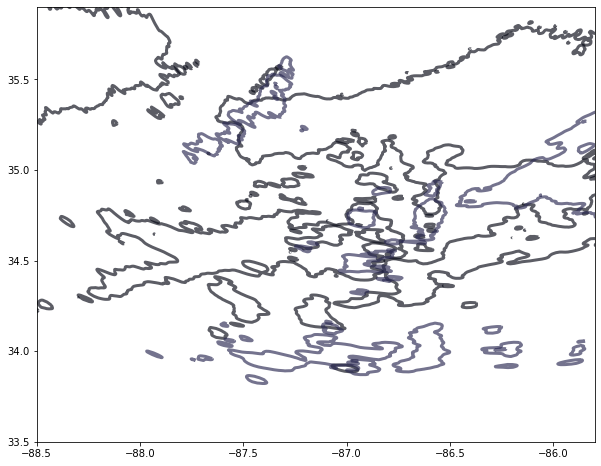

In [553]:
fig = plt.figure(figsize=(10,8))
hours = [18,19,20]
dcolors,icol = 1/(len(hours)*2), 0

for hour in [7,8]:
    for mins in [0]:
        analysis_time = dt.datetime(2017,3,10,hour, mins)
        date = analysis_time.strftime('%Y%m%d')
        HHMM = analysis_time.strftime('%H%M')
        #fname = '/media/jessmcd/MyPassport/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)
        fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)
        rdata = pickle.load(open(fname, 'rb'))
        lons, lats, ref = rdata[0], rdata[1], rdata[2]
        
        
        smoothed = nd.gaussian_filter(ref, sigma = 1.4)
        plt.contour(lons,lats, smoothed, levels=[30], colors = [cmocean.cm.ice(icol)],
                linewidths=3, alpha=0.65)
        plt.xlim(-88.5,-85.8)
        plt.ylim(33.5, 35.9)
        icol += dcolors
plt.show()

/Users/jessmcd/miniconda3/envs/py3_bm/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/Users/jessmcd/miniconda3/envs/py3_bm/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/jessmcd/miniconda3/envs/py3_bm/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: linewidths is ignored by contourf
/Users/jessmcd/miniconda3/envs/py3_bm/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: linewidths is ignored by contourf
/Users/jessmcd/miniconda3/envs/py3_bm/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: linewidths is ignored by contourf
/Users/jessmcd/miniconda3/envs/py3_bm/lib/python3.7/site-packages/ipykerne

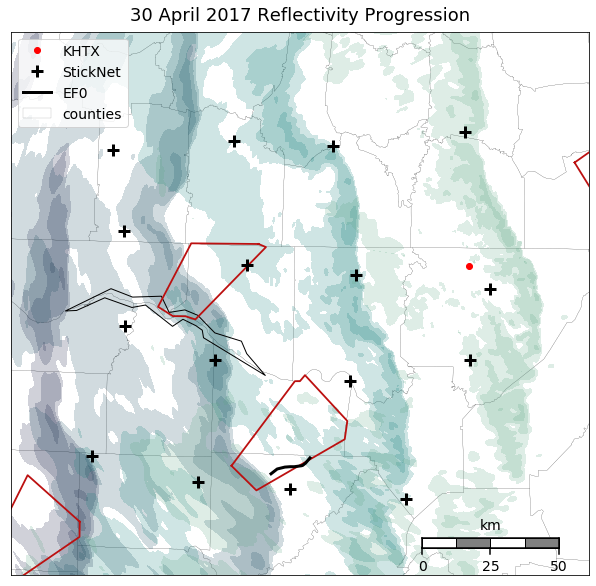

In [2]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
# note.... you'll need to have run something with the radar of choice to have this info
lat_0 = 34.93055725097656 #KHTX
lon_0 = -86.08361053466797
lat_1 = 35.5
llcrnrlon=-87.9
llcrnrlat=33.9
urcrnrlon=-85.6
urcrnrlat=35.7

m = Basemap(resolution = 'i',projection='lcc',
            lat_1 = lat_1, lon_0 = lon_0, lat_0 = lat_0,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat)
m.drawcoastlines()
m.drawcounties()

# Plot Radar Outlines
hours = [18, 19, 20, 21]
dcolors,icol = 1/(len(hours)+1), 0

for hour in hours:
    for mins in [0]:
        analysis_time = dt.datetime(2017,4,30,hour, mins)
        date = analysis_time.strftime('%Y%m%d')
        HHMM = analysis_time.strftime('%H%M')
        #fname = '/media/jessmcd/MyPassport/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)
        fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)

        rdata = pickle.load(open(fname, 'rb'))
        lons, lats, ref = rdata[0], rdata[1], rdata[2]
        
        
        smoothed = nd.gaussian_filter(ref, sigma = 1.6)
        
        m.contourf(lons,lats, smoothed, levels=[30,70], colors = [cmocean.cm.tempo_r(icol)],
                linewidths=3, alpha=0.2, latlon=True)
        m.contourf(lons,lats, smoothed, levels=[40,70], colors = [cmocean.cm.tempo_r(icol)],
                linewidths=3, alpha=0.2, latlon=True)
        m.contourf(lons,lats, smoothed, levels=[50,70], colors = [cmocean.cm.tempo_r(icol)],
                linewidths=3, alpha=0.2, latlon=True)
        m.contourf(lons,lats, smoothed, levels=[60,70], colors = [cmocean.cm.tempo_r(icol)],
                linewidths=3, alpha=0.2, latlon=True)
#         m.contour(lons,lats, smoothed, levels=[40], colors = [cmocean.cm.matter_r(icol)],
#                 linewidths=3, alpha=0.45, latlon=True, label = '{0} UTC'.format(HHMM))
        icol += dcolors


m.drawmapscale(urcrnrlon-.4,llcrnrlat+.12,llcrnrlon, llcrnrlat,\
               length = 50,linewidth=1.5, fontsize=14, barstyle='fancy',fillcolor2='gray')

poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
# plot the warning poly
plot_warning(poly, m, linewidth = 1.8, color='#bc1010', label='_nolegend_')#,label = 'Tor Warning')#

# Mark the radar
m.plot(lon_0, lat_0, marker='o', color='r', linewidth=0.0,label='KHTX', latlon=True)

# Plot StickNet data and text at each basemap location for the probes
mylabel = 'StickNet'
for n,probe in enumerate(probe_locs):
    if n <16:
        lat,lon = probe_locs[probe][0],probe_locs[probe][1]
        
        m.plot(lon,lat, marker = '+', color = 'k', linewidth=0.0, markersize = 12, markeredgewidth=3,\
                  latlon = True, label = mylabel)
        mylabel="_nolegend_"
        lo,la = m(lon,lat)
#         plt.text(lo,la-9000, probe, fontsize=12,\
#                  ha='center', va='center', weight='bold', color='#545556')

tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
m.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], color = 'k', linewidth=3, label=tortrack.loc[0]['rating'],\
      latlon=True)



plt.legend(loc=2, fontsize=14)
plt.title('30 April 2017 Reflectivity Progression', fontsize=18, y=1.01)
plt.show()

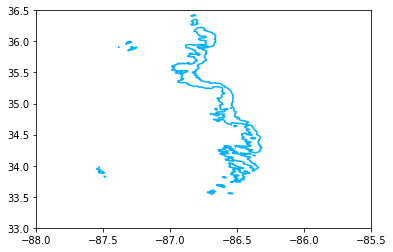

In [30]:
smoothed = nd.gaussian_filter(ref, sigma = 1.2)
plt.contour(lons,lats, smoothed, levels=[40], colors=[cm.jet(.3)])
plt.xlim(-88,-85.5)
plt.ylim(33, 36.5)
plt.show()

In [9]:
tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))

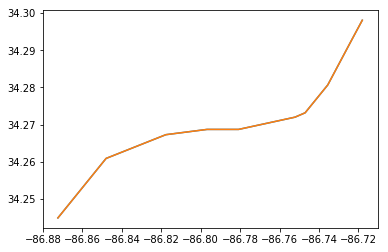

In [16]:
plt.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'])
plt.show()

In [28]:
len('0.16031416565937215')

19

In [59]:
ref_lon

-86.08361053466797

# Cartopy Code
### make sure you are in py3_cart enviro

In [1]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import cartopy
#import cartopy.io.shapereader as shpreader
from metpy.plots import USCOUNTIES
import datetime as dt
import matplotlib.pyplot as plt

# re-write code for cartopy versions if needed later
from WarningPoly import plot_warnings;

from netCDF4 import num2date
import numpy as np
import pyart;
import glob
import pytz
import SNmods3 as snmods
from functions_radar3 import get_radar_from_aws,_nearestDate
from scipy import interpolate
import matplotlib.cm as cm
import scipy.ndimage as nd
from collections import OrderedDict
import pandas as pd
import probe_info
import pickle
import cmocean

probe_locs = probe_info.probe_locs_2017


Basemap not found. Only import cartopy functions.

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3, fontsize=12, text_pad=5):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    text pad controls the spacing between the text (km, distance1, distance2) and the scale bar.
        squished numbers are bad!
    
    edited by Jessie. Found on GitHub - https://github.com/SciTools/cartopy/issues/490
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    # the edge is the black lines in between and extending on the edges of the white and gray parts
    # sbx is the center. length * 500 == half the length
    
    edge = 500
    bar_xs = [sbx - length * 500 - edge, sbx + length * 500 +edge]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth+4,solid_capstyle="butt")  # background
    
    #add colors - 4 colors
    x1, x2, x3, x4, x5 = sbx-length*500, sbx -length*250, sbx, sbx+length*250, sbx+length*500
    ax.plot([x1,x2-edge/2], [sby, sby], transform=tmc, color='w', linewidth=linewidth,solid_capstyle="butt")
    ax.plot([x2+edge/2,x3-edge/2] ,[sby, sby], transform=tmc, color='gray', linewidth=linewidth,solid_capstyle="butt")
    ax.plot([x3+edge/2,x4-edge/2] ,[sby, sby], transform=tmc, color='w', linewidth=linewidth,solid_capstyle="butt")
    ax.plot([x4+edge/2,x5] ,[sby, sby], transform=tmc, color='gray', linewidth=linewidth,solid_capstyle="butt")
    
    # add "km", center point, and end point
    y_lift = linewidth*text_pad
    ax.text(x3, sby+length*y_lift , str(round(2 * length / 4)), transform=tmc,
                    horizontalalignment='center', verticalalignment='bottom',
                    color='k', fontsize=fontsize)
    ax.text(x5-length*50, sby+length*y_lift , str(round(length)), transform=tmc,
            horizontalalignment='center', verticalalignment='bottom',
            color='k', fontsize=fontsize)
    ax.text(x1+length*60, sby+length*y_lift , 'km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom',
            color='k', fontsize=fontsize)

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

def plot_lat_lon(ax, lon_labels, lat_labels, top_label=False, left_label=False, bottom_label=True, right_label=True, linewidth=1,
                color='gray', text_color='gray',text_size=15, alpha=0.5, linestyle='--'):

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=linewidth, color=color, alpha=alpha, linestyle=linestyle)
    gl.xlabels_top = top_label
    gl.ylabels_left = left_label
    gl.xlabels_bottom = bottom_label
    gl.ylabels_right = right_label
    #gl.xlines = False
    gl.xlocator = mticker.FixedLocator(lon_labels)
    gl.ylocator = mticker.FixedLocator(lat_labels)
    gl.xformatter = LONGITUDE_FORMATTER

    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': text_size, 'color': text_color}
    gl.ylabel_style = {'size': text_size, 'color': text_color}
    
    
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib
import cmocean

def rgb(hexcol):
    return matplotlib.colors.to_rgba(hexcol)
def make_cmap(colors, n_bin=50):
    return LinearSegmentedColormap.from_list('newcmap', colors, N=n_bin)

def min_col(cmap, minval=0.0, maxval=1.0, n=15):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Set up our projection
crs = ccrs.PlateCarree()
globe = ccrs.Globe(datum='WGS84',ellipse='sphere')

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='10m',
        facecolor='none')

west_lon=-88
south_lat=33.7
east_lon=-85.6
north_lat=35.8


#lon_add, lat_add
LL = (west_lon),(north_lat)
UR = (east_lon ),(south_lat)
LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())
date='20170430'

/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(720, 1832)
(720, 1832)
(720, 1832)
(720, 1832)


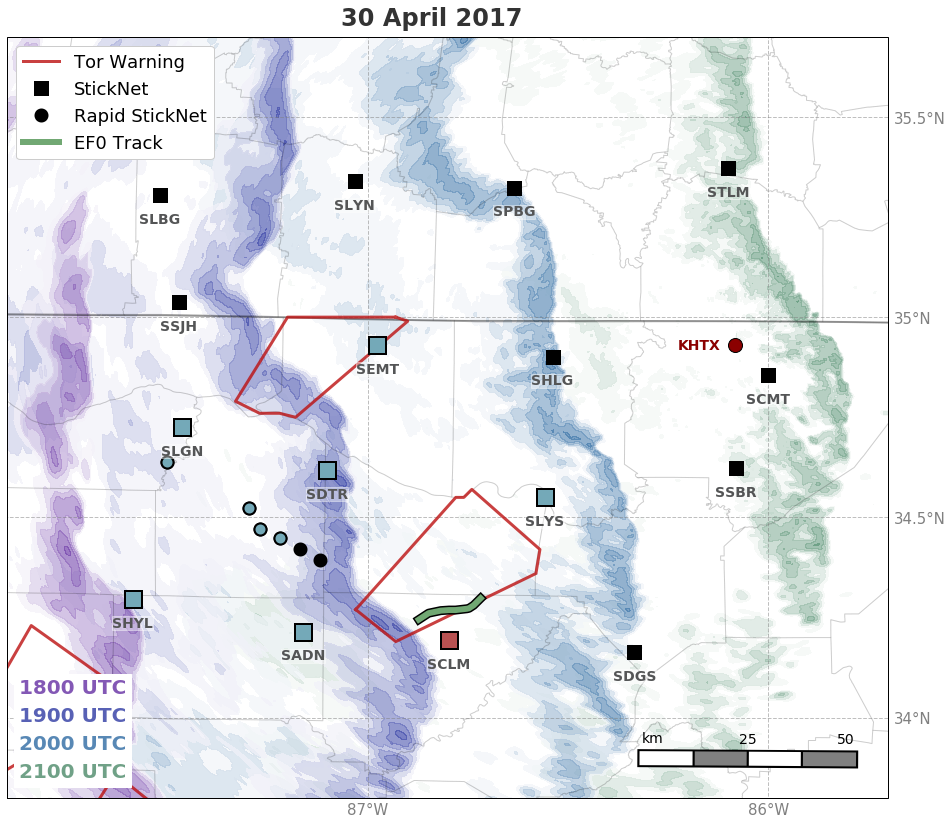

In [9]:
fig = plt.figure(1, figsize=(18, 14))
ax = plt.subplot(111, projection=crs)
west_lon=-87.9
south_lat=33.8
east_lon=-85.7
north_lat=35.7


#lon_add, lat_add
LL = (west_lon),(north_lat)
UR = (east_lon ),(south_lat)
LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())
ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)

ax.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
ax.add_feature(USCOUNTIES.with_scale('500k'), alpha=0.1) # 20m, 5m 500k sizes from large to small
# use 20m for testing, and 500k for final plots
       
# plot the warning poly
poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
plot_warnings(poly, ax, linewidth = 3,alpha=0.8, color='#bc1010',label = 'Tor Warning')#    
    
# add the StickNets
for n,probe in enumerate(probe_locs):
    if n <16:
        lat,lon = probe_locs[probe][0],probe_locs[probe][1]
        ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 10, markeredgewidth=5, label='StickNet')
        ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 10, markeredgewidth=3)
        
        if probe in ['0102A', '0106A', '0214A', '0111A', '0217A','0112A'] :
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 12, markeredgewidth=7)
            ax.plot(lon,lat, marker = 's', color = '#74a9b8', linewidth=0.0, 
                markersize = 12, markeredgewidth=3)
        
        if probe == '0107A':
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 12, markeredgewidth=7)
            ax.plot(lon,lat, marker = 's', color = '#b85151', linewidth=0.0, 
                markersize = 12, markeredgewidth=3)
            
        if lat > south_lat and lat < north_lat: # don't let SN plot outside of plot
            if lon < east_lon and lon > west_lon:
                plt.text(lon,lat-.06, probe_locs[probe][3], fontsize=14,\
                             ha='center', va='center', weight='bold', color='#545556',\
                             bbox=dict(facecolor='w', alpha=0.4, edgecolor='w', pad=0))
                
# add the rapid probes                
rapid_locs = {
 '0222': [-87.26764,34.472091],
 '0221': [-87.296503,34.523322],
 '0219': [-87.120229,34.394485],
 '0218': [-87.21975,34.448162],
 '0224': [-87.16902,34.420291],
 '0220': [-87.500392,34.639214]}
for n, probe in enumerate(rapid_locs):
    lat,lon = rapid_locs[probe][1],rapid_locs[probe][0]
    ax.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
            markersize = 7, markeredgewidth=7, label='Rapid StickNet')
    ax.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
            markersize = 7, markeredgewidth=3)
    
    if probe in ['0220','0221','0222','0218'] :
        ax.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
            markersize = 7, markeredgewidth=7)
        ax.plot(lon,lat, marker = 'o', color = '#74a9b8', linewidth=0.0, 
            markersize = 7, markeredgewidth=3)
        
# Plot Radar Outlines
i = 0
clist = ['#337a55','#115696','#111e96','#4f1196','#861196']
for hour in [21,20,19,18]:
    for mins in [0]:
        analysis_time = dt.datetime(2017,4,30,hour, mins)
        date = analysis_time.strftime('%Y%m%d')
        HHMM = analysis_time.strftime('%H%M')
        fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)

        rdata = pickle.load(open(fname, 'rb'))
        lons, lats, ref = rdata[0], rdata[1], rdata[2]
        print(np.shape(ref))
   
        smooth = nd.gaussian_filter(ref, sigma = 1.1)

#         refmap = make_cmap([rgb('#a7d1ae'),rgb('#e6db8e'),rgb('#d9aa68'),rgb('#b2776b'), rgb('#a34531')])
#         newcmap=make_cmap([rgb('#a7d1ae'),rgb('#e6db8e'),rgb('#d9aa68'),rgb('#b2776b'), rgb('#a34531')])
        
        newcmap=make_cmap([rgb('#ffffff'),rgb(clist[i])])
        ax.contourf(lons, lats, smooth, levels=np.arange(30,70,5), cmap=min_col(newcmap, minval=0), alpha=0.7)
        i+=1

# Mark the radar
lat_0,lon_0 = 34.93055725097656,-86.08361053466797 # KHTX
ax.plot(lon_0, lat_0, marker='o', color='k', linewidth=0.0,markersize = 14)
ax.plot(lon_0, lat_0, marker='o', color='darkred', linewidth=0.0,markersize = 12)
ax.text(lon_0-0.09, lat_0, 'KHTX', fontsize=14, ha='center', va='center', weight='bold', color='darkred',\
                             bbox=dict(facecolor='w', alpha=0.4, edgecolor='w', pad=0))

# plot tornado track
tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = 'k', linewidth=9)
ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = '#71a873', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))

# legend
handles, labels =ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),fontsize=18, loc=2, framealpha=1)

# add scale bar
scale_bar(ax, length=50, location=(0.84, 0.05), linewidth=14, fontsize=14)

# add lat lons
lons, lats =[-88, -87, -86, -85],[33.5, 34.0,34.5, 35.0, 35.5, 36]
plot_lat_lon(ax, lons, lats)


# add times in corner
i, lon, bot_lat=0, -87.87, 33.85
for time in [21,20,19,18]:
    plt.text(lon, bot_lat+(.07*i), '{}00 UTC'.format(time), fontsize=20, color=clist[i], weight='bold',
            bbox=dict(facecolor='white', edgecolor='white',pad=5), alpha=0.7)
    i+=1
 
plt.suptitle('30 April 2017', fontsize=24,weight='bold', y=0.91, alpha=0.8)
file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/Pub_Figures/'
file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/NewAnalyses/PubPlots/'
plt.savefig('{0}30April_CaseOverview.png'.format(file_dir), bbox_inches = 'tight', format='png', dpi=300);
plt.show()

In [713]:
rapid_locs['0222'][0]

87.26764

(720, 1832)
(720, 1832)
(720, 1832)
(720, 1832)
(720, 1832)


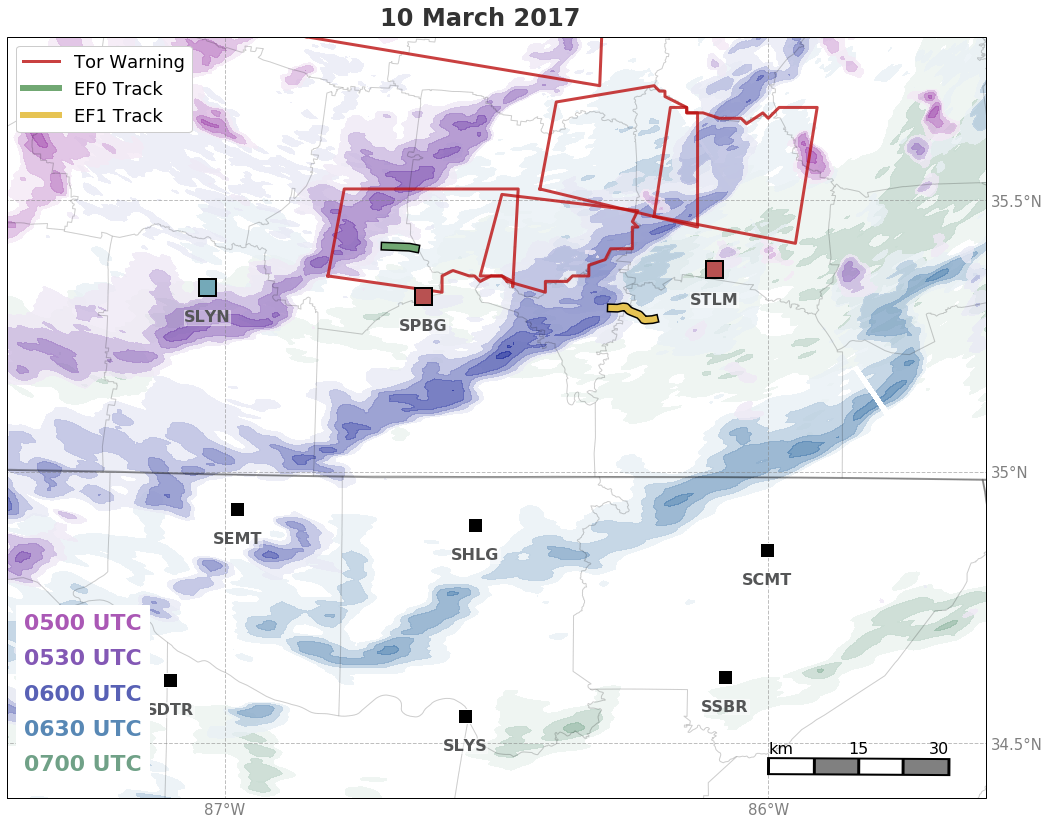

In [11]:
fig = plt.figure(1, figsize=(18, 14))
ax = plt.subplot(111, projection=crs)

west_lon=-87.4
south_lat=34.4
east_lon=-85.6
north_lat=35.8
date='20170310'

#lon_add, lat_add
LL = (west_lon),(north_lat)
UR = (east_lon ),(south_lat)
LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())
ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)

ax.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
ax.add_feature(USCOUNTIES.with_scale('500k'), alpha=0.1) # 20m, 5m 500k sizes from large to small
                                                        # use 20m for testing, and 500k for final plots
    
# plot the warning poly
poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
plot_warnings(poly, ax, linewidth = 3,alpha=0.8, color='#bc1010',label = 'Tor Warning')#
    
    
# add the StickNets
for n,probe in enumerate(probe_locs):
    if n <16:
        lat,lon = probe_locs[probe][0],probe_locs[probe][1]
        ax.plot(lon,lat, marker = 's', color = 'w', linewidth=0.0, 
                markersize = 10, markeredgewidth=5)
        
        ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 10, markeredgewidth=3)
        
        if probe == '0104A':
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 12, markeredgewidth=7)
            ax.plot(lon,lat, marker = 's', color = '#74a9b8', linewidth=0.0, 
                markersize = 12, markeredgewidth=3)
        
        if probe == '0108A' or probe == '0216A':
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 12, markeredgewidth=7)
            ax.plot(lon,lat, marker = 's', color = '#b85151', linewidth=0.0, 
                markersize = 12, markeredgewidth=3)
        
        if lat > south_lat and lat < north_lat: # don't let SN plot outside of plot
            if lon < east_lon and lon > west_lon:
                plt.text(lon,lat-.055, probe_locs[probe][3], fontsize=16,\
                             ha='center', va='center', weight='bold', color='#545556',\
                             bbox=dict(facecolor='w', alpha=0.4, edgecolor='w', pad=0))

# Plot Radar Outlines

i = 0
clist = ['#337a55','#115696','#111e96','#4f1196','#861196']

times = ['700', '630', '600', '530', '500']
for time in times:
    hour, mins = int(time[0]), int(time[1:])
    analysis_time = dt.datetime(2017,3,10,hour, mins)
    date = analysis_time.strftime('%Y%m%d')
    HHMM = analysis_time.strftime('%H%M')
    fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)

    rdata = pickle.load(open(fname, 'rb'))
    lons, lats, ref = rdata[0], rdata[1], rdata[2]
    print(np.shape(ref))

    smooth = nd.gaussian_filter(ref, sigma = 1.1)
    newcmap=make_cmap([rgb('#ffffff'),rgb(clist[i])])
    ax.contourf(lons, lats, smooth, levels=np.arange(40,70,5), cmap=min_col(newcmap, minval=0), alpha=0.8)
    i+=1

    


# plot tornado track
tortrack = pickle.load(open('20170310_TorTrack.p', 'rb'))

# EFO
ax.plot(tortrack.iloc[1]['lons'],tortrack.iloc[1]['lats'], 
        color = 'k', linewidth=9)
ax.plot(tortrack.iloc[1]['lons'],tortrack.iloc[1]['lats'], 
        color = '#71a873', linewidth=6, label='{} Track'.format(tortrack.loc[1]['rating']))
#EF1
ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = 'k', linewidth=9)
ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = '#e6c353', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))

# legend
handles, labels =ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),fontsize=18, loc=2, framealpha=1)

# add scale bar
scale_bar(ax, length=30, location=(0.87, 0.04), linewidth=14, fontsize=16)

# add lat lons
lons, lats =[-88, -87, -86, -85],[33.5, 34.0,34.5, 35.0, 35.5, 36]
plot_lat_lon(ax, lons, lats)

# add times in corner
i, lon, bot_lat=0, -87.37, 34.45
for time in times:
    plt.text(lon, bot_lat+(.065*i), '0{} UTC'.format(time), fontsize=22, color=clist[i], weight='bold',
            bbox=dict(facecolor='white', edgecolor='white',pad=8), alpha=0.7)
    i+=1

plt.suptitle('10 March 2017', fontsize=24,weight='bold', y=0.91, alpha=0.8)
#file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/Pub_Figures/'
file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/NewAnalyses/PubPlots/'
plt.savefig('{0}10March_CaseOverview.png'.format(file_dir), bbox_inches = 'tight', format='png', dpi=300);
plt.show()

### 9-event figure as req

### Other figs

In [5]:
import matplotlib.patches as mpatches

# Set up our projection
crs = ccrs.PlateCarree()
globe = ccrs.Globe(datum='WGS84',ellipse='sphere')


# colors
water = '#a3c0c7'


# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='10m',
        facecolor='none')
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=water)
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m', facecolor='none',
                                         edgecolor=water)

In [9]:
from stormdata import get_reports2016, get_reports2017
directory = r'/Users/jessmcd/Documents/MyPassport_backup/VortexSE/StormData/StormData2017.csv'
event = get_reports2017(dt.datetime(2017,3,10),'Thunderstorm Wind',directory)
#event2 = get_reports2017(date,'Funnel Cloud',directory)
probe_locs = probe_info.probe_locs_2017

/Users/jessmcd/Documents/GitHub_repos/vortexse/stormdata.py:115: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  event.set_value(n,'date-time', utc_dt)
/Users/jessmcd/Documents/GitHub_repos/vortexse/stormdata.py:132: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  event.set_value(n,'endtime', utc_dt)


In [12]:
event

wfo tor_rating  start_lat  start_lon  \
0   HUN        NaN    34.9700   -86.7800   
1   HUN        NaN    34.5487   -86.6062   
2   HUN        NaN    34.6914   -85.6676   
3   HUN        NaN    34.2876   -85.9941   
4   HUN        NaN    34.3181   -86.4958   
5   HUN        NaN    34.4943   -85.8477   
6   HUN        NaN    35.1777   -86.3386   
7   HUN        NaN    35.2944   -86.3159   
8   HUN        NaN    35.3444   -86.3047   
9   HUN        NaN    35.3100   -86.3300   
10  HUN        NaN    34.6855   -86.6204   
11  HUN        NaN    35.2506   -86.3598   
12  HUN        NaN    35.3158   -86.3590   
13  HUN        NaN    35.2800   -86.3000   
14  HUN        NaN    35.2900   -86.2800   
15  HUN        NaN    35.3097   -86.3281   
16  HUN        NaN    35.2748   -86.3009   
17  HUN        NaN    35.2994   -86.2988   
18  HUN        NaN    35.3094   -86.3126   
19  HUN        NaN    35.2633   -86.3685   
20  HUN        NaN    35.3327   -86.2360   
21  HUN        NaN    35.3038   -86.2517   
22  HUN        NaN    35.2900   -86.2300   
23  HUN        NaN    34.8177   -86.8504   
24  HUN        NaN    34.3990   -86.7277   
25  BMX        NaN    33.4519   -87.0158   
26  BMX        NaN    33.3600   -86.6600   
27  BMX        NaN    33.4400   -86.0700   
28  BMX        NaN    33.2300   -86.5700   
29  BMX        NaN    33.3600   -85.8300   
30  BMX        NaN    33.3671   -85.7406   
31  BMX        NaN    33.2712   -85.8355   
32  BMX        NaN    32.5400   -86.2200   
33  BMX        NaN    32.4800   -86.3600   
34  BMX        NaN    32.4298   -86.4151   
35  OHX        NaN    35.8491   -85.8026   
36  OHX        NaN    35.5700   -86.0000   
37  OHX        NaN    35.3485   -86.2261   
38  OHX        NaN    35.8447   -85.7676   

                                                 info  \
0   A quasi-linear convective system developed rap...   
1   A quasi-linear convective system developed rap...   
2   A quasi-linear convective system developed rap...   
3   A quasi-linear convective system developed rap...   
4   A quasi-linear convective system developed rap...   
5   A quasi-linear convective system developed rap...   
6   A quasi-linear convective system developed rap...   
7   A quasi-linear convective system developed rap...   
8   A quasi-linear convective system developed rap...   
9   A quasi-linear convective system developed rap...   
10  A quasi-linear convective system developed rap...   
11  A quasi-linear convective system developed rap...   
12  A quasi-linear convective system developed rap...   
13  A quasi-linear convective system developed rap...   
14  A quasi-linear convective system developed rap...   
15  A quasi-linear convective system developed rap...   
16  A quasi-linear convective system developed rap...   
17  A quasi-linear convective system developed rap...   
18  A quasi-linear convective system developed rap...   
19  A quasi-linear convective system developed rap...   
20  A quasi-linear convective system developed rap...   
21  A quasi-linear convective system developed rap...   
22  A quasi-linear convective system developed rap...   
23  A quasi-linear convective system developed rap...   
24  A quasi-linear convective system developed rap...   
25  An approaching short wave trough and increasin...   
26  An approaching short wave trough and increasin...   
27  An approaching short wave trough and increasin...   
28  An approaching short wave trough and increasin...   
29  An approaching short wave trough and increasin...   
30  An approaching short wave trough and increasin...   
31  An approaching short wave trough and increasin...   
32  An approaching short wave trough and increasin...   
33  An approaching short wave trough and increasin...   
34  An approaching short wave trough and increasin...   
35  Another significant severe weather event struc...   
36  Another significant severe weather event struc...   
37  Another significant severe weather event struc...   
38  Another signific

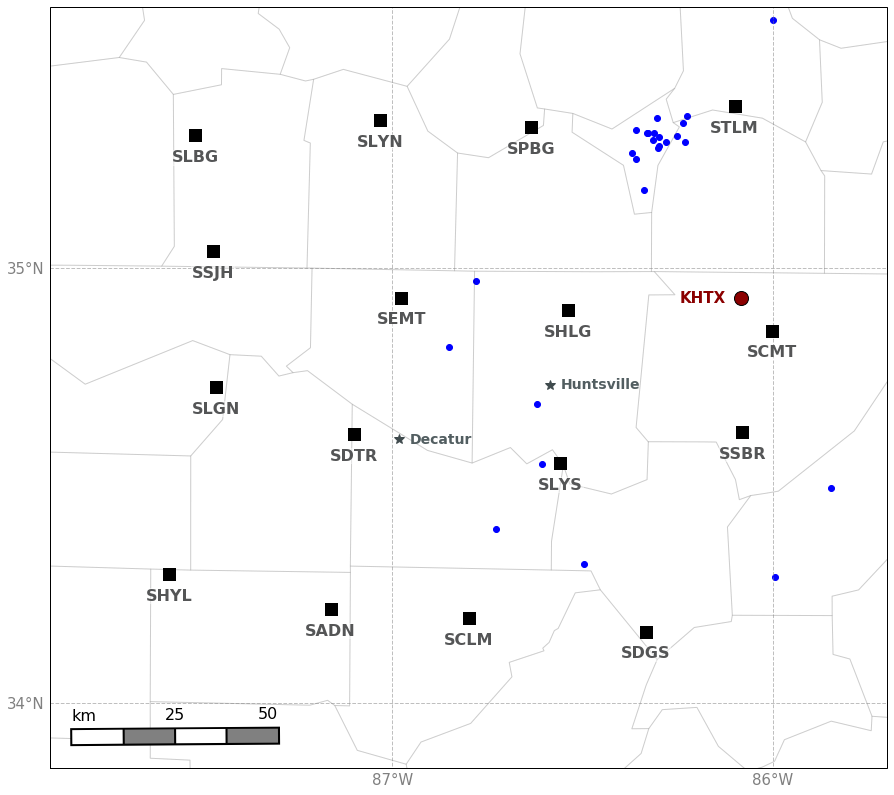

In [13]:
west_lon=-87.9
south_lat=33.85
east_lon=-85.7
north_lat=35.6

#lon_add, lat_add
LL = (west_lon),(north_lat)
UR = (east_lon ),(south_lat)
LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())

fig = plt.figure(1, figsize=(15, 14))
ax = plt.subplot(111, projection=crs)
ax.set_aspect('auto')
ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)


# set up map additions
# ax.add_feature(states_provinces, edgecolor='k', alpha=0.5, linewidth=2)
# ax.add_feature(rivers_10m)
# ax.add_feature(lakes_10m)
ax.add_feature(USCOUNTIES.with_scale('20m'), alpha=0.1) # 20m, 5m 500k sizes from large to small
                                                        # use 20m for testing, and 500k for final plots

# add the StickNets
for n,probe in enumerate(probe_locs):
    if n <16:
        lat,lon = probe_locs[probe][0],probe_locs[probe][1]
   
        ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 10, markeredgewidth=3,label = 'StickNet')
        
        plt.text(lon,lat-.05, probe_locs[probe][3], fontsize=16,\
                     ha='center', va='center', weight='bold', color='#545556',\
                     bbox=dict(facecolor='w', alpha=0.4, edgecolor='w', pad=0))


# Mark the radar
lat_0,lon_0 = 34.93055725097656,-86.08361053466797 # KHTX
ax.plot(lon_0, lat_0, marker='o', color='k', linewidth=0.0,markersize = 14, label='KHTX')
ax.plot(lon_0, lat_0, marker='o', color='darkred', linewidth=0.0,markersize = 12, label='KHTX')
ax.text(lon_0-.04, lat_0, 'KHTX', fontsize=15,ha='right', va='center', weight='bold', color='darkred')

# add scale bar
scale_bar(ax, length=50, location=(0.15, 0.04), linewidth=14, fontsize=16)

# add lat lons
lons, lats =[-89,-88, -87, -86, -85, -84],[33, 34.0, 35.0, 36, 37]
plot_lat_lon(ax, lons, lats, left_label=True, right_label=False)


#title
#ax.set_title('2016 and 2017 StesoNet Locations', fontsize=24, y=1.01)


for i in event.index:
    plt.scatter(event.loc[i]['start_lon'], event.loc[i]['start_lat'], marker='o', color='b')

# add cities
ax.plot(-86.5861,34.7304, marker = '*', color = '#3f4a4d', 
        linewidth=0.0, markersize = 10, markeredgewidth=1,label = 'StickNet')
plt.text(-86.5861+.03,34.7304, 'Huntsville', fontsize=14,
         ha='left', va='center', weight='bold', color='#525e61');

ax.plot(-86.9833,34.6059, marker = '*', color = '#3f4a4d', 
        linewidth=0.0, markersize = 10, markeredgewidth=1,label = 'StickNet')
plt.text(-86.9833+0.03,34.6059, 'Decatur', fontsize=14,
         ha='left', va='center', weight='bold', color='#525e61');

# ax.add_feature(cfeature.LAKES)
# ax.add_feature(cfeature.RIVERS, color='blue')
#file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/Pub_Figures/'
#plt.savefig('{0}SNdomain.png'.format(file_dir), bbox_inches = 'tight', format='png', dpi=300);

34.6176 -87.1014


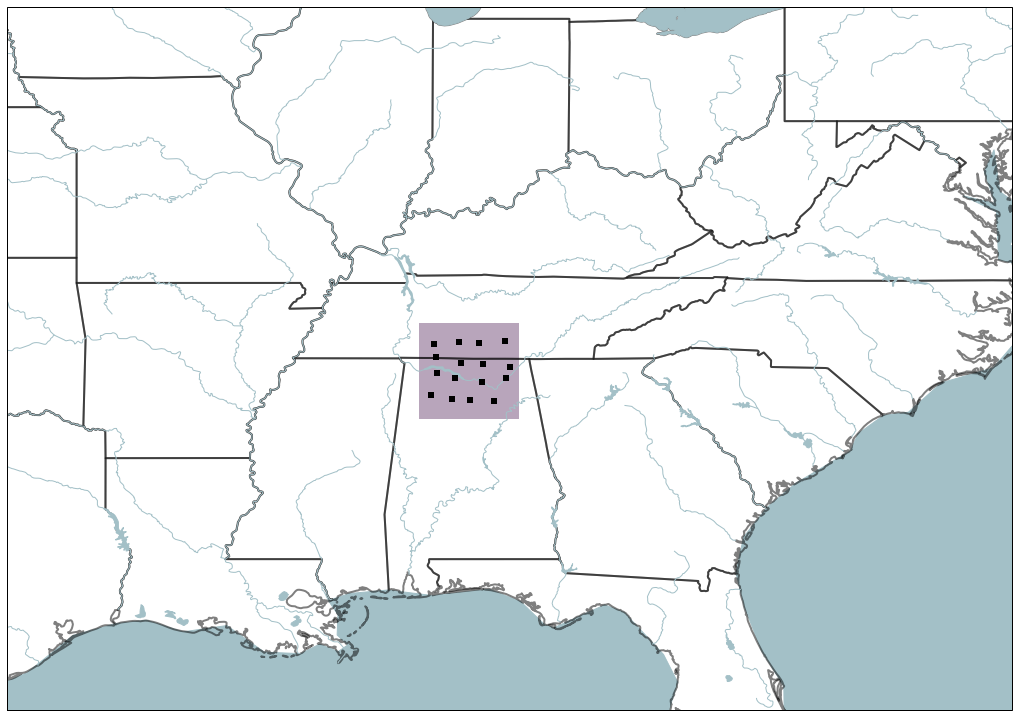

In [9]:
west_lon=-96
south_lat=28
east_lon=-76
north_lat=42

#lon_add, lat_add
LL = (west_lon),(north_lat)
UR = (east_lon ),(south_lat)
LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())

fig = plt.figure(1, figsize=(18, 14))
ax = plt.subplot(111, projection=crs)
ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)

ax.add_feature(states_provinces, edgecolor='k', alpha=0.5, linewidth=2)
ax.add_feature(rivers_10m)
ax.add_feature(lakes_10m)


#ax.plot(34.5,-86.5, marker='s', markersize=200, linewidth=0, color='g', alpha=0.3)   
# add the StickNets
for n,probe in enumerate(probe_locs):
    if n <16:
        lat,lon = probe_locs[probe][0],probe_locs[probe][1]
   
        ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 3, markeredgewidth=3,label = 'StickNet')
     

ax.add_feature(cartopy.feature.OCEAN, color=water)
# ax.add_patch(mpatches.Rectangle(xy=[-87.8, 33.8], width=2, height=1.9,
#                                     facecolor='w',edgecolor='#8a6a8f',linewidth=5,
#                                     alpha=0.99,
#                                     transform=crs))

ax.add_patch(mpatches.Rectangle(xy=[-87.8, 33.8], width=2, height=1.9,
                                    facecolor='#8a6a8f',
                                    alpha=0.6,
                                    transform=crs))

# ax.text(-88.2,33,'StesoNet', fontsize=28, weight='bold',
#         bbox=dict(facecolor='w', alpha=0.6, edgecolor='w', pad=0))
print(lat,lon)

In [46]:
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor='b')
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor='b')

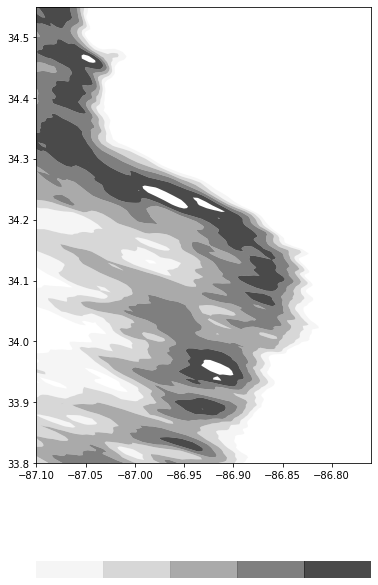

In [61]:
fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,'1900')
rdata = pickle.load(open(fname, 'rb'))
lons, lats, ref = rdata[0], rdata[1], rdata[2]

refmap = make_cmap([rgb('#80ad87'),rgb('#e2d156'),rgb('#b2776b')])
refmap = make_cmap([rgb('#b8ccb1'),rgb('#bfb37c'),rgb('#9c7264')])
smooth = nd.gaussian_filter(ref, sigma = .9)
fig=plt.figure(figsize=(6,12))
cnt = plt.contourf(lons, lats, smooth, levels=np.arange(30,60,5), cmap='Greys', alpha=.8, antialiased=True)
cbar=plt.colorbar(cnt, orientation='horizontal')
cbar.ax.tick_params(size=0)
cbar.set_ticks([])
cbar.outline.set_visible(False)
#cnt = plt.contourf(lons, lats, smooth, levels=np.arange(10,70,5), cmap='Greys', alpha=.5, antialiased=True)
#cnt = plt.contour(lons, lats, smooth, levels=[40,70], colors='k', alpha=.5, antialiased=True)
#cnt = plt.contourf(lons, lats, smooth, levels=np.arange(30,65,5), cmap='Greys', alpha=.3)

plt.ylim(33.8,34.55)
plt.xlim(-87.1, -86.76)
plt.show()

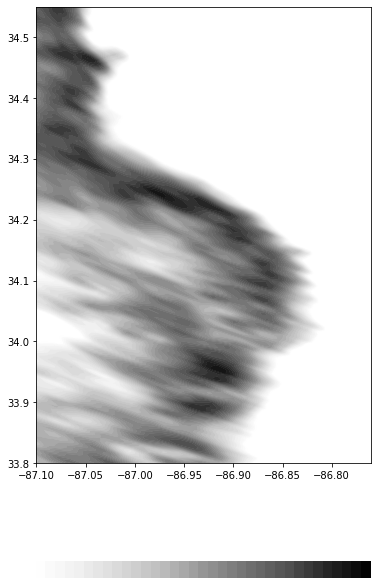

In [22]:
fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,'1900')
rdata = pickle.load(open(fname, 'rb'))
lons, lats, ref = rdata[0], rdata[1], rdata[2]

# refmap = make_cmap([rgb('#80ad87'),rgb('#e2d156'),rgb('#b2776b')])
# refmap = make_cmap([rgb('#b8ccb1'),rgb('#bfb37c'),rgb('#9c7264')])
smooth = nd.gaussian_filter(ref, sigma = .9)
fig=plt.figure(figsize=(6,12))
#cnt = plt.contourf(lons, lats, smooth, levels=np.arange(25,61,1), cmap = 'pyart_HomeyerRainbow', alpha=.8, antialiased=True)
cnt = plt.contourf(lons, lats, smooth, levels=np.arange(25,61,1), cmap = 'Greys', alpha=1, antialiased=True)
cnt = plt.contourf(lons, lats, smooth, levels=np.arange(25,61,1), cmap = 'Greys', alpha=1, antialiased=True)
cbar=plt.colorbar(cnt, orientation='horizontal')
cbar.ax.tick_params(size=0)
cbar.set_ticks([])
cbar.outline.set_visible(False)
#cnt = plt.contourf(lons, lats, smooth, levels=np.arange(10,70,5), cmap='Greys', alpha=.5, antialiased=True)
#cnt = plt.contour(lons, lats, smooth, levels=[40,70], colors='k', alpha=.5, antialiased=True)
#cnt = plt.contourf(lons, lats, smooth, levels=np.arange(30,65,5), cmap='Greys', alpha=.3)

plt.ylim(33.8,34.55)
plt.xlim(-87.1, -86.76)
plt.show()

### Reflec and Vel plots

In [10]:
def get_vals(field):
# Set plotting ranges for radar fields
    if field == 'reflectivity':
        vmin = 0
        vmax = 70
        sweep = 0
        cbar_label = 'Reflectivity (dBZ)'
        cmap = 'pyart_NWSRef'
    elif field == 'velocity':
        vmin = -24 #-30
        vmax = 24 #30
        sweep = 1
        cbar_label = r'Radial Velocity (m s$^{-1}$)'
        cmap = 'pyart_Carbone42'#ctables.registry.get_with_steps('Carbone42', 16,16)
    return vmin,vmax,sweep,cbar_label,cmap

def plot_radar_sticknet_RefandVel(radar, date, warning_poly = None, event=None):
    """ Function takes in a radar object and data from StickNets to plot the surface observations
    on top of the radar sweep. 
    Required inputs:
        radar: pyart radar object
        data: dictionary of sticknet T,P,RH,etc.
        obstime: Valid time of StickNet data
    Optional inputs:
        field: radar field name given in a string (i.e., reflectivity, velocity)
    """
    #Set up Plot
    crs = ccrs.PlateCarree()
    # Get data to plot state and province boundaries
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lakes',
            scale='10m',
            facecolor='none')
    west_lon=-87.6
    south_lat=34
    east_lon=-86.5
    north_lat=35.2
      # add the rapid probes                
    rapid_locs = {
     '0222': [-87.26764,34.472091],
     '0221': [-87.296503,34.523322],
     '0219': [-87.120229,34.394485],
     '0218': [-87.21975,34.448162],
     '0224': [-87.16902,34.420291],
     '0220': [-87.500392,34.639214]}

    #lon_add, lat_add
    LL = (west_lon),(north_lat)
    UR = (east_lon ),(south_lat)
    LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
    UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())
    

    
    # Initialize plot and basemap
    fig = plt.figure(figsize = [22,10])
    
    
    
    
    # REFLECTIVITY
    ax =  fig.add_subplot(121, projection=crs)
    #ax.set_aspect('auto')
        
    ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
    ax.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
    ax.add_feature(USCOUNTIES.with_scale('500k'), alpha=0.1) # 20m, 5m 500k sizes from large to small
    # use 20m for testing, and 500k for final plots

    # plot the warning poly
    poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
    plot_warnings(poly, ax, linewidth = 3,alpha=0.8, color='#bc1010',label = None)#    

    # add the StickNets
    for n,probe in enumerate(probe_locs):
        if n <16:
            lat,lon = probe_locs[probe][0],probe_locs[probe][1]
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 10, markeredgewidth=5, label='StickNet')
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 10, markeredgewidth=3)

            if probe in ['0102A', '0106A', '0214A', '0111A', '0217A','0112A'] :
                ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 12, markeredgewidth=7)
                ax.plot(lon,lat, marker = 's', color = '#74a9b8', linewidth=0.0, 
                    markersize = 12, markeredgewidth=3)

            if probe == '0107A':
                ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 12, markeredgewidth=7)
                ax.plot(lon,lat, marker = 's', color = '#b85151', linewidth=0.0, 
                    markersize = 12, markeredgewidth=3)

            if lat > south_lat and lat < north_lat: # don't let SN plot outside of plot
                if lon < east_lon and lon > west_lon+0.05:
                    plt.text(lon,lat-.055, probe_locs[probe][3], fontsize=15,\
                                 ha='center', va='center', weight='bold', color='k')
                    
    for n, probe in enumerate(rapid_locs):
        lat,lon = rapid_locs[probe][1],rapid_locs[probe][0]
        ax.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
                markersize = 7, markeredgewidth=7, label='Rapid StickNet')
        ax.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
                markersize = 7, markeredgewidth=3)
        get_RP_text_loc(lon, lat, probe)

        if probe in ['0220','0221','0222','0218'] :
            ax.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
                markersize = 7, markeredgewidth=7)
            ax.plot(lon,lat, marker = 'o', color = '#74a9b8', linewidth=0.0, 
                markersize = 7, markeredgewidth=3)
            
            
 
    vmin,vmax,sweep,cbar_label,cmap = get_vals('reflectivity')
    cmap = pyart.graph.cm_colorblind.HomeyerRainbow
    
        # Grab indeces and times from radar object
    
    field = 'reflectivity'
    sweep = 2
    display = pyart.graph.RadarMapDisplay(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]
    # getting contours
    #x,y = display._get_x_y(sweep = 0, edges = False, filter_transitions = True)
    ref_lat = display.loc[0]
    ref_lon = display.loc[1]
    #lon_pos,lat_pos = convert_lon_lat(ref_lon,ref_lat,x,y)
    data_reflec = radar.get_field(0,'reflectivity')
    data_vel = radar.get_field(1,'velocity')

    sweep = 0
    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = num2date(radar.time['data'][index_at_start], 
                                      radar.time['units'])
    #central = pytz.timezone('US/Central')
    #local_time = central.fromutc(time_at_start_of_radar)
    #fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
    fancy_date_string_utc = time_at_start_of_radar.strftime('%H%M UTC %d %b %Y')
    
#     image = ax.contourf(lon_pos,lat_pos,data_reflec,levels = np.arange(0,71,5),cmap = 'pyart_NWSRef'\
#                       , alpha=0.7, lw=0, antialiased=True)
    
    image = display.plot_ppi_map('reflectivity', sweep, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax,
                                 colorbar_label=cbar_label, title_flag=False, colorbar_flag=False,
                                projection=crs, lat_lines=[0], lon_lines=[0], alpha=0.8)
    
    # plot tornado track
    tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
    ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
            color = 'k', linewidth=9)
    ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = '#71a873', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))
    
    # adds larger title and gives stylistic control over colorbar
  
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),pad=0.02, ax=ax, alpha=0.8)
    cbar.set_label(cbar_label, fontsize = 18, labelpad = 8)
    cbar.ax.tick_params(labelsize = 14)
     #title
    title = '{0} {1}, {2}'.format(station,'WSR-88D',fancy_date_string_utc)
    plt.suptitle(title, fontsize = 24, y = 0.93, weight='bold')
    
    # add legend and mapscale
    handles, labels =ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),fontsize=14, loc=3, framealpha=1)
    
       
    # Mark the radar
    ax.plot(lon_0, lat_0, marker='o', color='r', label='KHTX')

    
    # corc;e
    circ = plt.Circle((-86.94, 34.27), radius=.08, fill=False, ec='k', linestyle='--', linewidth=4)
    ax.add_patch(circ)
    
    circ = plt.Circle((-87.08, 34.76), radius=.08, fill=False, ec='k', linestyle='--', linewidth=4)
    ax.add_patch(circ)
    
    circ = plt.Circle((-87.19, 34.86), radius=.08, fill=False, ec='k', linestyle='--', linewidth=4, label='Mesovortex')
    ax.add_patch(circ)

    
    #VELOCITY
    
    ax1 = fig.add_subplot(122, projection=crs)
    #ax1.set_aspect('auto')
    display = pyart.graph.RadarMapDisplay(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]
    
    ax1.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
    ax1.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
    ax1.add_feature(USCOUNTIES.with_scale('500k'), alpha=0.1) # 20m, 5m 500k sizes from large to small
    # use 20m for testing, and 500k for final plots

    # plot the warning poly
    poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
    plot_warnings(poly, ax1, linewidth = 3,alpha=0.8, color='#bc1010',label = 'Tor Warning')#    

    # add the StickNets
    for n,probe in enumerate(probe_locs):
        if n <16:
            lat,lon = probe_locs[probe][0],probe_locs[probe][1]
            ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 10, markeredgewidth=5, label='StickNet')
            ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 10, markeredgewidth=3)

            if probe in ['0102A', '0106A', '0214A', '0111A', '0217A','0112A'] :
                ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 12, markeredgewidth=7)
                ax1.plot(lon,lat, marker = 's', color = '#74a9b8', linewidth=0.0, 
                    markersize = 12, markeredgewidth=3)

            if probe == '0107A':
                ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                    markersize = 12, markeredgewidth=7)
                ax1.plot(lon,lat, marker = 's', color = '#b85151', linewidth=0.0, 
                    markersize = 12, markeredgewidth=3)

            if lat > south_lat and lat < north_lat: # don't let SN plot outside of plot
                if lon < east_lon and lon > west_lon+0.05:
                    if probe in ['0214A', '0111A', '0213A']:
                        plt.text(lon,lat-.055, probe_locs[probe][3], fontsize=15,\
                                     ha='center', va='center', weight='bold', color='k')
                    else: 
                        plt.text(lon,lat-.055, probe_locs[probe][3], fontsize=15,\
                                     ha='center', va='center', weight='bold', color='w')
                    
    for n, probe in enumerate(rapid_locs):
        lat,lon = rapid_locs[probe][1],rapid_locs[probe][0]
        ax1.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
                markersize = 7, markeredgewidth=7, label='Rapid StickNet')
        ax1.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
                markersize = 7, markeredgewidth=3)
        get_RP_text_loc(lon, lat, probe, color='w')
        

        if probe in ['0220','0221','0222','0218'] :
            ax1.plot(lon,lat, marker = 'o', color = 'k', linewidth=0.0, 
                markersize = 7, markeredgewidth=7)
            ax1.plot(lon,lat, marker = 'o', color = '#74a9b8', linewidth=0.0, 
                markersize = 7, markeredgewidth=3)
            

            
            
    vmin,vmax,sweep,cbar_label,cmap = get_vals('velocity')
    vmin = -30
    vmax = 30
    cmap = cmocean.cm.balance
#     x,y = display._get_x_y(sweep = 1, edges = False, filter_transitions = True)
#     lon_pos,lat_pos = convert_lon_lat(ref_lon,ref_lat,x,y)
        
    image2 = display.plot_ppi_map('velocity', sweep, cmap=cmap, ax=ax1, vmin=vmin, vmax=vmax,
                                 colorbar_label=cbar_label, title_flag=False, colorbar_flag=False,
                                projection=crs,lat_lines=[0], lon_lines=[0])

        # plot tornado track
    tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
    ax1.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
            color = 'k', linewidth=9)
    ax1.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = '#71a873', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))
 
    # adds larger title and gives stylistic control over colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cbar2 = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),pad=0.02, ax=ax1)
    cbar2.set_label(cbar_label, fontsize = 18, labelpad = 8)
    cbar2.ax.tick_params(labelsize = 14)
    
    # Mark the radar
    ax1.plot(lon_0, lat_0, marker='o', color='r', label='KHTX')
    
    
    # corc;e
    circ = plt.Circle((-86.94, 34.27), radius=.08, fill=False, ec='k', linestyle='--', linewidth=4)
    ax1.add_patch(circ)
    
    circ = plt.Circle((-87.08, 34.76), radius=.08, fill=False, ec='k', linestyle='--', linewidth=4)
    ax1.add_patch(circ)
    
    circ = plt.Circle((-87.19, 34.86), radius=.08, fill=False, ec='k', linestyle='--', linewidth=4)
    ax1.add_patch(circ)

    scale_bar(ax1, length=20, location=(0.87, 0.03), linewidth=8, fontsize=14, text_pad=10)
    
    plt.subplots_adjust(wspace=0.03)#, top = .89) #.03,.84
    
    
    ax.text(.02, 0.94, 'a)',  fontsize=28, color='k', alpha=0.6,weight='bold',  transform=ax.transAxes,
            bbox=dict(facecolor='w', edgecolor='w', pad=1))
    ax1.text(.02, 0.94, 'b)', fontsize=28, color='k', alpha=0.6,weight='bold', transform=ax1.transAxes,
             bbox=dict(facecolor='w', edgecolor='w', pad=1))
    
    # print statement
    print('saved image from {0}'.format(fancy_date_string_utc))

    # save fig
    file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/NewAnalyses/PubPlots/'
#     '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/Pub_Figures/'
    plt.savefig('{0}30AprilRadarZoom.png'.format(file_dir), bbox_inches = 'tight', format='png', dpi=300);
    plt.show()   

/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
def get_RP_text_loc(lon, lat, probe, color = 'k'):
    text = '{}A'.format(probe)
    if text == '0222A':
        dlon, dlat = +0.065, +0.007
        plt.text(lon+dlon,lat+dlat, text, fontsize=13,\
                                 ha='center', va='bottom', weight='bold', color=color)
        
    
    
#     if text == '0220A':
#         dlon, dlat = 0, -0.05
#     else:
#         dlon, dlat = +0.05, +0.01
        
        
#     plt.text(lon+dlon,lat+dlat, text, fontsize=11,\
#                                  ha='center', va='bottom', weight='bold', color=color)

/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


228 228
saved image from 1906 UTC 30 Apr 2017


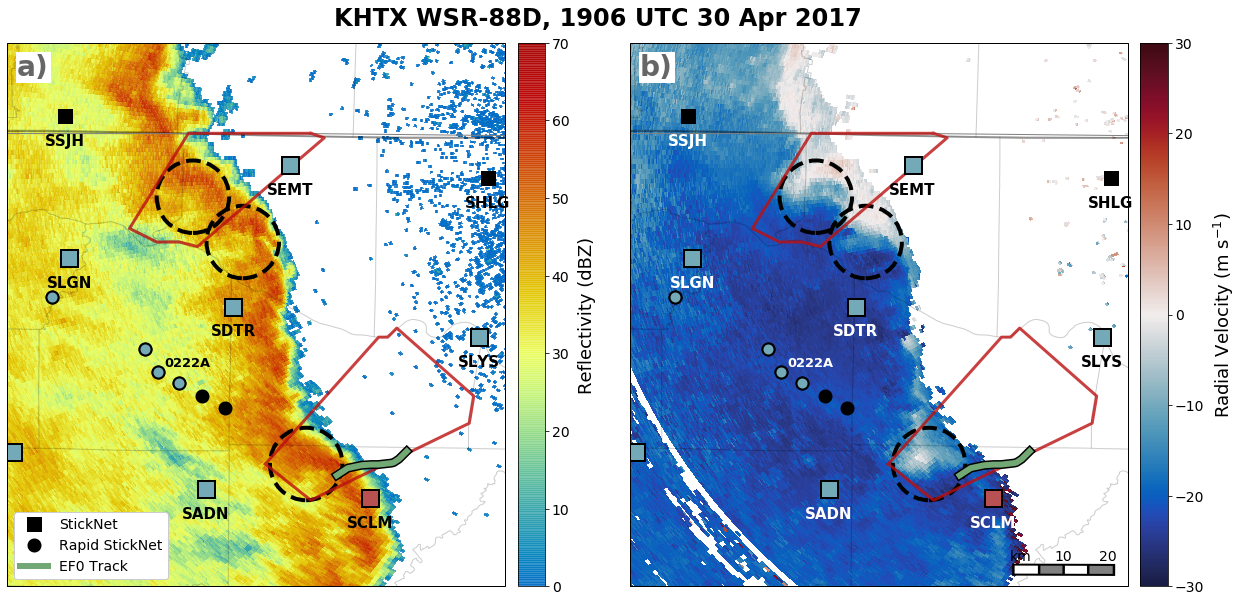

In [11]:
#station = 'KOHX'
station = 'KHTX'
from netCDF4 import num2date # KEEP THIS, num2date gets clobbered by reading in tor tracks
import matplotlib.lines as mlines

analysis_time = dt.datetime(2017,4,30,19,8)
radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
radar = radar_list[0]

plot_radar_sticknet_RefandVel(radar, '20170430')

# mesovortex lifecycle plots

In [4]:
import matplotlib.gridspec as gridspec

def get_vals(field):
# Set plotting ranges for radar fields
    if field == 'reflectivity':
        vmin = 0
        vmax = 70
        sweep = 0
        cbar_label = 'Reflectivity (dBZ)'
        cmap = 'pyart_NWSRef'
    elif field == 'velocity':
        vmin = -30
        vmax = 30
        sweep = 1
        cbar_label = 'Radial Velocity (m/s)'
        cmap = cmocean.cm.balance#ctables.registry.get_with_steps('Carbone42', 16,16)
    return vmin,vmax,sweep,cbar_label,cmap


def plot_vel_zoom(ax1, radar, mapscale=False, legend=False):
    west_lon=-87.2
    south_lat=34
    east_lon=-86.5
    north_lat=34.6

     #lon_add, lat_add
    LL = (west_lon),(north_lat)
    UR = (east_lon ),(south_lat)
    LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
    UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())

        #ax1.set_aspect('auto')
    display = pyart.graph.RadarMapDisplay(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]

    ax1.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
    ax1.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
    ax1.add_feature(USCOUNTIES.with_scale('20m'), alpha=0.1) # 20m, 5m 500k sizes from large to small
    # use 20m for testing, and 500k for final plots

    # plot the warning poly
    poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
    plot_warnings(poly, ax1, linewidth = 3,alpha=0.8, color='#bc1010', label=None)#    

    # add the StickNets
    for n,probe in enumerate(probe_locs):
        if probe == '0107A':
            lon,lat = probe_locs[probe][1], probe_locs[probe][0]
            ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 8, markeredgewidth=9)
            ax1.plot(lon,lat, marker = 's', color = '#b85151', linewidth=0.0, 
                markersize = 8, markeredgewidth=5, label='SCLM')

    vmin,vmax,sweep,cbar_label,cmap = get_vals('velocity')
    vmin = -30
    vmax = 30
    cmap = cmocean.cm.balance
    #     x,y = display._get_x_y(sweep = 1, edges = False, filter_transitions = True)
    #     lon_pos,lat_pos = convert_lon_lat(ref_lon,ref_lat,x,y)

    image2 = display.plot_ppi_map('velocity', sweep, cmap=cmap, ax=ax1, vmin=vmin, vmax=vmax,
                                 colorbar_label=cbar_label, title_flag=False, colorbar_flag=False,lon_lines=[-80],
                                projection=crs)

        # plot tornado track
    tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
    ax1.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
            color = 'k', linewidth=9)
    ax1.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = '#71a873', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))


    
    if mapscale:
        scale_bar(ax1, length=12, location=(0.87, 0.04), linewidth=7, fontsize=16, text_pad=12)
    if legend:
        ax1.legend(loc=2, fontsize=16, framealpha=0.99)
        
        
    sweep = 0
    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = num2date(radar.time['data'][index_at_start], 
                                      radar.time['units'])
#     central = pytz.timezone('US/Central')
#     local_time = central.fromutc(time_at_start_of_radar)
#     fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
#     fancy_date_string_utc = time_at_start_of_radar.strftime('%Y-%m-%d %H:%M UTC')
    ax1.set_title(time_at_start_of_radar.strftime('%H%M UTC'), fontsize=22, y=1.01)
    
    
    

/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


229 229
230 230
231 231


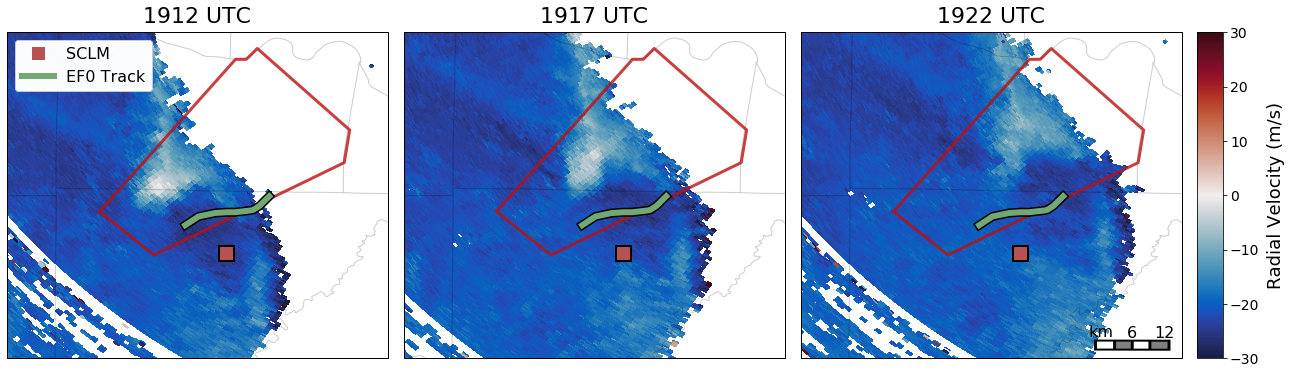

In [9]:
fig = plt.figure(figsize=(18,6))

gs = gridspec.GridSpec(1,3)
gs.update(left=0.05, right=0.96, wspace=0.03, hspace=0.15)
ax1 = plt.subplot(gs[0,0], projection=crs)
ax2 = plt.subplot(gs[0,1], projection=crs)
ax3 = plt.subplot(gs[0,2], projection=crs)

analysis_time = dt.datetime(2017,4,30,19,12)
radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
radar1 = radar_list[0]
plot_vel_zoom(ax1, radar1, legend=True)
#del radar

analysis_time = dt.datetime(2017,4,30,19,17)
radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
radar2 = radar_list[0]
plot_vel_zoom(ax2, radar2)
#del radar

analysis_time = dt.datetime(2017,4,30,19,22)
radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
radar3 = radar_list[0]
plot_vel_zoom(ax3, radar3, mapscale=True)
#del radar


gs0= gridspec.GridSpec(1,1)
gs0.update(left=0.97, right=0.99, wspace=0.05)
ax_cbar=plt.subplot(gs0[0])

cmap = cmocean.cm.balance
norm = plt.Normalize(vmin=-30, vmax=30)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), pad=0.02, cax=ax_cbar)
cbar.set_label('Radial Velocity (m/s)', fontsize = 18, labelpad = 8)
cbar.ax.tick_params(labelsize = 14)

# print statement
#print('saved image from {0}'.format(fancy_date_string_utc))

 # save fig
file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/NewAnalyses/PubPlots/'
plt.savefig('{0}30AprilMV.png'.format(file_dir), bbox_inches = 'tight', format='png', dpi=300);

In [5]:
#'2330','2300','2230','2200'
for time in ['1912', '1917', '1922']:
        hour = int(time[0:2]); mins=int(time[2:])
        analysis_time = dt.datetime(2017,4,30,hour, mins)
        station = 'KHTX'
        radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
        radar = radar_list[0]
#         lat_pos, lon_pos, _ = radar.get_gate_lat_lon_alt(1)
#         data_vel = radar.get_field(1,'velocity')

        date = analysis_time.strftime('%Y%m%d')
        HHMM = analysis_time.strftime('%H%M')
        fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_RadarObj.p'.format(date,HHMM)
        pickle.dump(radar, open(fname, 'wb') )

229 229
230 230
231 231


In [5]:
import scipy.ndimage as nd

def ppi_vort(radar, swp_id=1):
    ''' updated Sept 28 2020, missing the multiplication by 2'''
    vel = radar.get_field(swp_id,'velocity')#in m/s
    phi = np.unique(radar.get_elevation(swp_id))[0]#in degrees
    theta = radar.get_azimuth(swp_id)#in degrees
   
    rangearray = np.tile(radar.range['data'],(len(theta),1))# in m
    vort = np.zeros_like(vel)
    vort=2*(1./(rangearray*np.sin(np.deg2rad(90-phi))))*np.gradient(vel,np.deg2rad(theta),axis=0)
    return vort


def plot_vel_vort_zoom(ax1, radar, mapscale=False, legend=False):
    west_lon=-87.2
    south_lat=34
    east_lon=-86.5
    north_lat=34.6

     #lon_add, lat_add
    LL = (west_lon),(north_lat)
    UR = (east_lon ),(south_lat)
    LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
    UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())

        #ax1.set_aspect('auto')
    display = pyart.graph.RadarMapDisplay(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]

    ax1.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
    ax1.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
    ax1.add_feature(USCOUNTIES.with_scale('500k'), alpha=0.1) 

    # plot the warning poly
    poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
    plot_warnings(poly, ax1, linewidth = 2, color='#bc1010', label=None)#    

    # add the StickNets
    for n,probe in enumerate(probe_locs):
        if probe == '0107A':
            lon,lat = probe_locs[probe][1], probe_locs[probe][0]
            ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 8, markeredgewidth=9)
            ax1.plot(lon,lat, marker = 's', color = '#b85151', linewidth=0.0, 
                markersize = 8, markeredgewidth=5, label='SCLM')

    vmin,vmax,sweep,cbar_label,cmap = get_vals('velocity')
    vmin = -30
    vmax = 30
    cmap = cmocean.cm.balance
    image2 = display.plot_ppi_map('velocity', sweep, cmap=cmap, ax=ax1, vmin=vmin, vmax=vmax,
                                 colorbar_label=cbar_label, title_flag=False, colorbar_flag=False,lon_lines=[-80],
                                projection=crs)

        # plot tornado track
    tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
    ax1.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
            color = 'k', linewidth=9)
    ax1.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
        color = '#71a873', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))


    
    if mapscale:
        scale_bar(ax1, length=20, location=(0.82, 0.04), linewidth=7, fontsize=16, text_pad=12)
    if legend:
        ax1.legend(loc=2, fontsize=16, framealpha=0.99)
        
        
    sweep = 0
    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = num2date(radar.time['data'][index_at_start], 
                                      radar.time['units'])

    ax1.set_title(time_at_start_of_radar.strftime('%H%M UTC'), fontsize=22, y=1.01)
    
    
def plot_smooth_vort(ax1, radar, sigma=1.2):
    vort = ppi_vort(radar)
    vort_smooth = nd.gaussian_filter(vort, sigma = sigma)
    lat, lon, _ = radar.get_gate_lat_lon_alt(sweep=1)
    ax1.contour(lon, lat, vort_smooth, levels=np.arange(0.002, 0.0120, 0.004), colors='w', alpha=0.8)
    ax1.contour(lon, lat, vort_smooth, levels=np.arange(-0.0120,-0.002,  0.004), colors='k')   
    

/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/jessmcd/miniconda3/envs/py3_cart/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


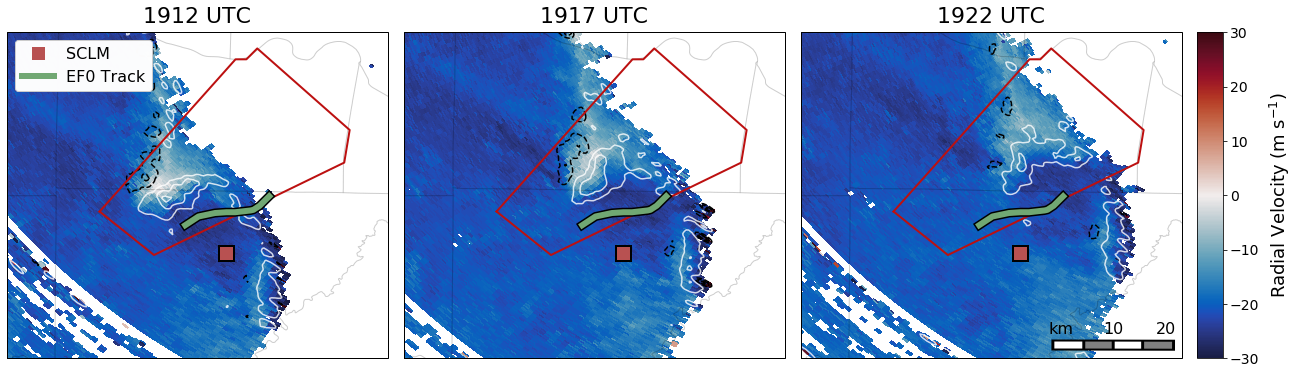

In [7]:
fig = plt.figure(figsize=(18,6))

gs = gridspec.GridSpec(1,3)
gs.update(left=0.05, right=0.96, wspace=0.03, hspace=0.15)
ax1 = plt.subplot(gs[0,0], projection=crs)
ax2 = plt.subplot(gs[0,1], projection=crs)
ax3 = plt.subplot(gs[0,2], projection=crs)


fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/201704301912_RadarObj.p'
radar1 = pickle.load(open(fname, 'rb'))
plot_vel_vort_zoom(ax1, radar1, legend=True)
plot_smooth_vort(ax1, radar1)


fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/201704301917_RadarObj.p'
radar2 = pickle.load(open(fname, 'rb'))
plot_vel_vort_zoom(ax2, radar2)
plot_smooth_vort(ax2, radar2)


fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/201704301922_RadarObj.p'
radar3 = pickle.load(open(fname, 'rb'))
plot_vel_vort_zoom(ax3, radar3, mapscale=True)
plot_smooth_vort(ax3, radar3)


gs0= gridspec.GridSpec(1,1)
gs0.update(left=0.97, right=0.99, wspace=0.05)
ax_cbar=plt.subplot(gs0[0])

cmap = cmocean.cm.balance
norm = plt.Normalize(vmin=-30, vmax=30)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), pad=0.02, cax=ax_cbar)
cbar.set_label(r'Radial Velocity (m s$^{-1}$)', fontsize = 18, labelpad = 8)
cbar.ax.tick_params(labelsize = 14)

file_dir = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/NewAnalyses/PubPlots/'
plt.savefig('{0}30AprilMV.png'.format(file_dir), bbox_inches = 'tight', format='png', dpi=300);

In [82]:
radar.get_elevation(sweep=1)

array([0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.43945312, 0.43945312, 0.43945312, 0.43945312, 0.43945312,
       0.4724121 , 0.4751587 , 0.49438477, 0.49987793, 0.48339844,
       0.48339844, 0.48339844, 0.48339844, 0.48339844, 0.48339

# March 21 2017 zoom on MV

In [115]:
probe_locs

{'0102A': [34.2959, -87.5871, 282, 'SHYL', 'Haleyville'],
 '0103A': [34.8551, -86.0017, 513, 'SCMT', 'Crow Mnt'],
 '0104A': [35.3391, -87.0324, 239, 'SLYN', 'Lynnville'],
 '0105A': [34.6224, -86.08, 182, 'SSBR', 'Scottsboro'],
 '0106A': [34.2149, -87.1619, 245, 'SADN', 'Addison'],
 '0107A': [34.19439, -86.79825, 231, 'SCLM', 'Cullman'],
 '0108A': [35.3236, -86.6347, 230, 'SPBG', 'Petersburg'],
 '0109A': [35.3045, -87.5185, 315, 'SLBG', 'Lawrenceburg'],
 '0110A': [34.1632, -86.3341, 280, 'SDGS', 'Douglas'],
 '0111A': [34.5504, -86.5582, 174, 'SLYS', 'Laceys Springs'],
 '0112A': [34.7254, -87.4625, 174, 'SLGN', 'Leighton'],
 '0213A': [34.9016, -86.5386, 239, 'SHLG', 'Hazel Green'],
 '0214A': [34.9309, -86.9764, 256, 'SEMT', 'Elkmont'],
 '0215A': [35.038, -87.4719, 237, 'SSJH', 'Saint Joseph'],
 '0216A': [35.3719, -86.0998, 305, 'STLM', 'Tullahoma'],
 '0217A': [34.6176, -87.1014, 192, 'SDTR', 'Decatur']}

In [134]:
def plot_mar21(radar, date, warning_poly = None, event=None):
    """ Function takes in a radar object and data from StickNets to plot the surface observations
    on top of the radar sweep. 
    Required inputs:
        radar: pyart radar object
        data: dictionary of sticknet T,P,RH,etc.
        obstime: Valid time of StickNet data
    Optional inputs:
        field: radar field name given in a string (i.e., reflectivity, velocity)
    """
    #Set up Plot
    crs = ccrs.PlateCarree()
    # Get data to plot state and province boundaries
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lakes',
            scale='10m',
            facecolor='none')
    west_lon=-87.5
    south_lat=35
    east_lon=-86.7
    north_lat=35.56
      # add the rapid probes                

    #lon_add, lat_add
    LL = (west_lon),(north_lat)
    UR = (east_lon ),(south_lat)
    LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
    UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())
    

    
    # Initialize plot and basemap
    fig = plt.figure(figsize = [22,8])
    
    
    
    
    # REFLECTIVITY
    ax =  fig.add_subplot(121, projection=crs)
    #ax.set_aspect('auto')
        
    ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
    ax.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
    ax.add_feature(USCOUNTIES.with_scale('20m'), alpha=0.1) # 20m, 5m 500k sizes from large to small
    # use 20m for testing, and 500k for final plots


    # add the StickNets
     # add the StickNets
    for n,probe in enumerate(probe_locs):
        if probe == '0104A':
            lon,lat = probe_locs[probe][1], probe_locs[probe][0]
            ax.plot(lon,lat, marker = 's', color = 'w', linewidth=0.0, 
                markersize = 8, markeredgewidth=7)
            ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 8, markeredgewidth=5, label='SLYN')
 
    vmin,vmax,sweep,cbar_label,cmap = get_vals('reflectivity')
    cmap = pyart.graph.cm_colorblind.HomeyerRainbow
    
        # Grab indeces and times from radar object
    
    field = 'reflectivity'
    sweep = 2
    display = pyart.graph.RadarMapDisplay(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]
    # getting contours

    ref_lat = display.loc[0]
    ref_lon = display.loc[1]
 
    sweep = 0
    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = num2date(radar.time['data'][index_at_start], 
                                      radar.time['units'])
    central = pytz.timezone('US/Central')
    local_time = central.fromutc(time_at_start_of_radar)
    fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
    fancy_date_string_utc = time_at_start_of_radar.strftime('%Y-%m-%d %H:%M UTC')

    
    image = display.plot_ppi_map('reflectivity', sweep, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax,
                                 colorbar_label=cbar_label, title_flag=False, colorbar_flag=False,
                                projection=crs)
  
    # adds larger title and gives stylistic control over colorbar
  
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),pad=0.02, ax=ax)
    cbar.set_label(cbar_label, fontsize = 18, labelpad = 8)
    cbar.ax.tick_params(labelsize = 14)
     #title
    title = '{0} {1} \n{2} ({3})'.format(station,'WSR-88D',fancy_date_string,fancy_date_string_utc)
    plt.suptitle(title, fontsize = 22)
    
    # add legend and mapscale
    handles, labels =ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),fontsize=14, loc=2, framealpha=1)
    
       
    # Mark the radar
    ax.plot(lon_0, lat_0, marker='o', color='r', label='KHTX')



    
    #VELOCITY
    
    ax1 = fig.add_subplot(122, projection=crs)
    #ax1.set_aspect('auto')
    display = pyart.graph.RadarMapDisplay(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]
    
    ax1.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
    ax1.add_feature(states_provinces, edgecolor='k', alpha=0.2, linewidth=2)
    ax1.add_feature(USCOUNTIES.with_scale('20m'), alpha=0.1) # 20m, 5m 500k sizes from large to small
    # use 20m for testing, and 500k for final plots


    # add the StickNets
    for n,probe in enumerate(probe_locs):
        if probe == '0104A':
            lon,lat = probe_locs[probe][1], probe_locs[probe][0]
            ax1.plot(lon,lat, marker = 's', color = 'w', linewidth=0.0, 
                markersize = 8, markeredgewidth=7)
            ax1.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                markersize = 8, markeredgewidth=5, label='SLYN')

            
    vmin,vmax,sweep,cbar_label,cmap = get_vals('velocity')
    vmin = -30
    vmax = 30
    cmap = cmocean.cm.balance

        
    image2 = display.plot_ppi_map('velocity', sweep, cmap=cmap, ax=ax1, vmin=vmin, vmax=vmax,
                                 colorbar_label=cbar_label, title_flag=False, colorbar_flag=False,
                                projection=crs)


 
    # adds larger title and gives stylistic control over colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cbar2 = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),pad=0.02, ax=ax1,)
    cbar2.set_label(cbar_label, fontsize = 18, labelpad = 8)
    cbar2.ax.tick_params(labelsize = 14)
    
    # Mark the radar
    ax1.plot(lon_0, lat_0, marker='o', color='r', label='KHTX')
    

    scale_bar(ax1, length=20, location=(0.87, 0.03), linewidth=8, fontsize=14, text_pad=10)
    
    plt.subplots_adjust(wspace=0.03)#, top = .89) #.03,.84

    # print statement
    print('saved image from {0}'.format(fancy_date_string_utc))

180 180
saved image from 2017-03-21 21:17 UTC


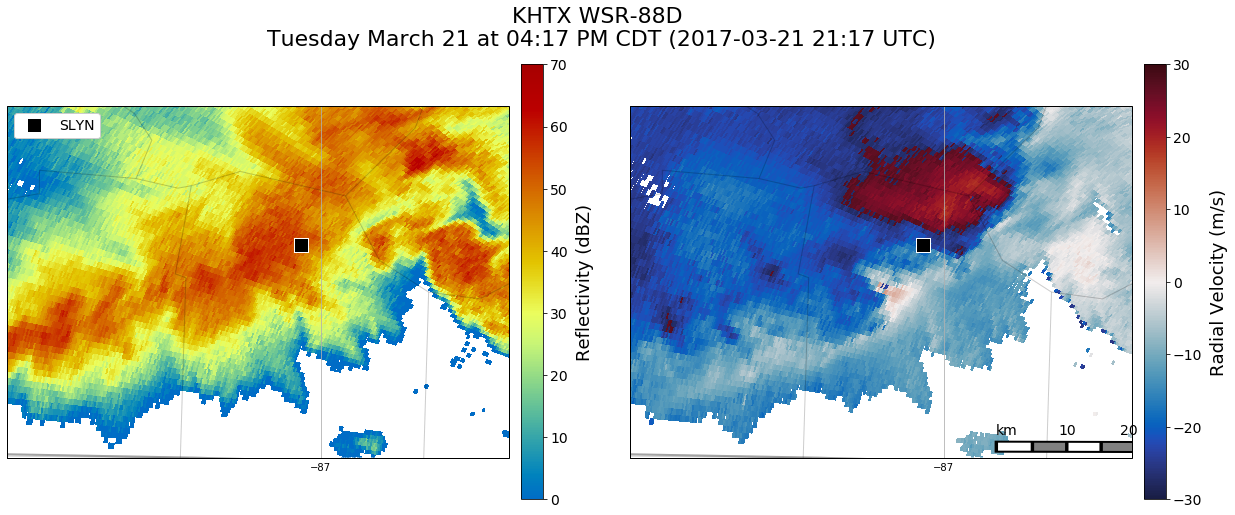

In [135]:
analysis_time = dt.datetime(2017,3,21,21,15)
radar_namelist, radar_list = get_radar_from_aws(station, analysis_time, analysis_time)
radar = radar_list[0]
plot_mar21(radar, date, warning_poly = None, event=None)

# general trash

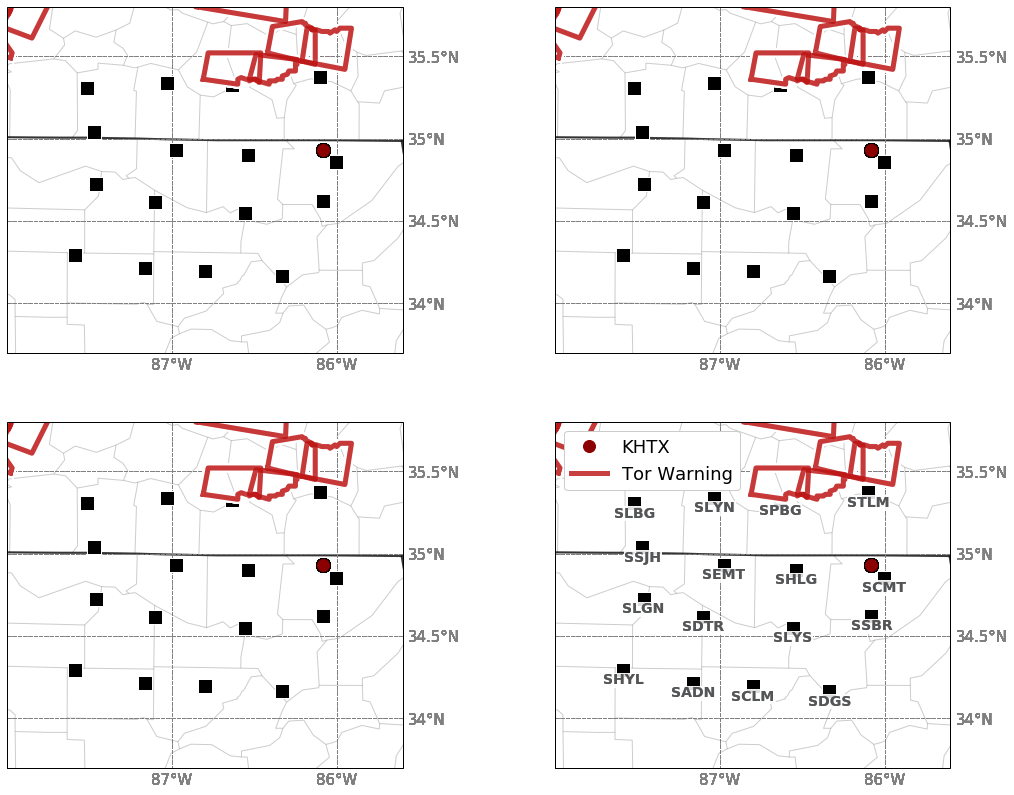

In [620]:
#fig = plt.figure(1, figsize=(18, 14))
fig, axes = plt.subplots(2,2, figsize=(18, 14), subplot_kw={'projection': crs})

for row in axes:
    for ax in row:
        ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)
        ax.add_feature(states_provinces, edgecolor='k', alpha=0.5, linewidth=2)
        ax.add_feature(USCOUNTIES.with_scale('20m'), alpha=0.1) # 20m, 5m 500k sizes from large to small
                                                            # use 20m for testing, and 500k for final plots
    # add the StickNets
        for n,probe in enumerate(probe_locs):
            if n <16:
                lat,lon = probe_locs[probe][0],probe_locs[probe][1]
                ax.plot(lon,lat, marker = 's', color = 'w', linewidth=0.0, 
                        markersize = 10, markeredgewidth=5)
                ax.plot(lon,lat, marker = 's', color = 'k', linewidth=0.0, 
                        markersize = 10, markeredgewidth=3)
                plt.text(lon,lat-.06, probe_locs[probe][3], fontsize=14,\
                             ha='center', va='center', weight='bold', color='#545556',\
                             bbox=dict(facecolor='w', alpha=0.4, edgecolor='w', pad=0))


                # Mark the radar
                lat_0,lon_0 = 34.93055725097656,-86.08361053466797 # KHTX
                ax.plot(lon_0, lat_0, marker='o', color='k', linewidth=0.0,markersize = 14, label='KHTX')
                ax.plot(lon_0, lat_0, marker='o', color='darkred', linewidth=0.0,markersize = 12, label='KHTX')

                # plot the warning poly
                poly = pickle.load(open('{0}_TorPoly.p'.format(date), 'rb'))
                # plot_warning_cartopy(poly, ax, linewidth = 6,alpha=0.8, color='w',label = 'Tor Warning')#
                # plot_warning_cartopy(poly, ax, linewidth = 3,alpha=0.8, color='#bc1010',label = 'Tor Warning')#
                plot_warning_cartopy(poly, ax, linewidth = 9,alpha=0.8, color='w',label = 'Tor Warning')#
                plot_warning_cartopy(poly, ax, linewidth = 5,alpha=0.8, color='#bc1010',label = 'Tor Warning')#

                # add lat lons
                lons, lats =[-88, -87, -86, -85],[33.5, 34.0,34.5, 35.0, 35.5, 36]
                plot_lat_lon(ax, lons, lats)

# Plot Radar Outlines

# i = 0

# for hour in [6,5]:
#     for mins in [30, 0]:
#         analysis_time = dt.datetime(2017,3,10,hour, mins)
#         date = analysis_time.strftime('%Y%m%d')
#         HHMM = analysis_time.strftime('%H%M')
#         #fname = '/media/jessmcd/MyPassport/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)
#         fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)

#         rdata = pickle.load(open(fname, 'rb'))
#         lons, lats, ref = rdata[0], rdata[1], rdata[2]
#         print(np.shape(ref))
        
#         smoothed = nd.gaussian_filter(ref, sigma = 1.8)
#         smooth = ref#nd.gaussian_filter(ref, sigma = 1.1)
  
#         newcmap=make_cmap([rgb('#ffffff'),rgb(clist[i])])
    
#         ax.contourf(lons, lats, smooth, levels=[30,55], colors='w', alpha=.7)
#         ax.contourf(lons, lats, smooth, levels=np.arange(30,70,5), cmap=min_col(newcmap, minval=.3), alpha=1)
#         i+=1

        
        


# plot tornado track
# tortrack = pickle.load(open('20170430_TorTrack.p', 'rb'))
# ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
#         color = 'k', linewidth=9)
# ax.plot(tortrack.iloc[0]['lons'],tortrack.iloc[0]['lats'], 
#         color = '#46855a', linewidth=6, label='{} Track'.format(tortrack.loc[0]['rating']))

# legend
handles, labels =ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),fontsize=18, loc=2, framealpha=1)

# add scale bar
# scale_bar(ax, length=50, location=(0.84, 0.05), linewidth=14, fontsize=14)


(720, 1832)
(720, 1832)
(720, 1832)
(720, 1832)
(720, 1832)
(720, 1832)


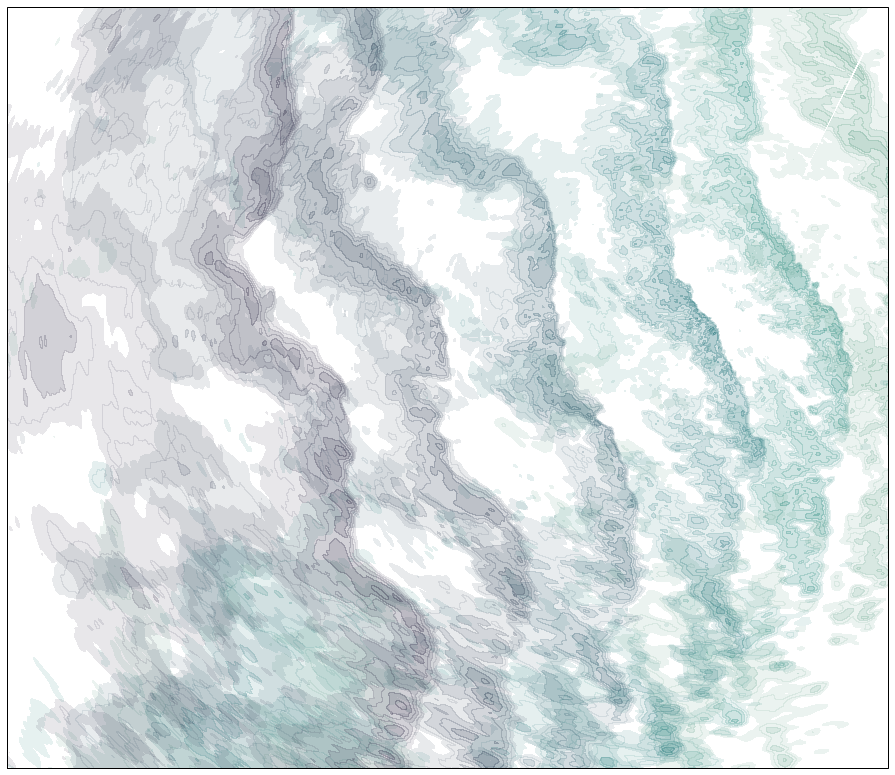

In [46]:
import pickle
fig = plt.figure(1, figsize=(18, 14))
ax = plt.subplot(111, projection=crs)
west_lon=-87.9
south_lat=33.8
east_lon=-85.7
north_lat=35.7


#lon_add, lat_add
LL = (west_lon),(north_lat)
UR = (east_lon ),(south_lat)
LL = crs.transform_point((west_lon),(north_lat),ccrs.PlateCarree())
UR = crs.transform_point((east_lon ),(south_lat),ccrs.PlateCarree())
ax.set_extent([LL[0], UR[0], LL[1], UR[1]], crs)

       
        
# Plot Radar Outlines
i = 0
ilist = np.linspace(0.5, 0.9, 6)
ilist = [cmocean.cm.rain(0.5),cmocean.cm.rain(0.6),cmocean.cm.rain(0.7),
        cmocean.cm.rain(0.8),cmocean.cm.rain(0.9),cmocean.cm.rain(.99)]
#clist = ['#337a55','#115696','#111e96','#4f1196','#861196']
for hour in [21,20,19]:
    for mins in [30,0]:
        analysis_time = dt.datetime(2017,4,30,hour, mins)
        date = analysis_time.strftime('%Y%m%d')
        HHMM = analysis_time.strftime('%H%M')
        fname = '/Users/jessmcd/Documents/MyPassport_backup/VortexSE/RadarSegs/{0}{1}_ReflecData.p'.format(date,HHMM)

        rdata = pickle.load(open(fname, 'rb'))
        lons, lats, ref = rdata[0], rdata[1], rdata[2]
        print(np.shape(ref))
   
        smooth = nd.gaussian_filter(ref, sigma = 1.1)
        
        #newcmap=make_cmap([rgb('#ffffff'),cmocean.cm.rain(ilist[i])])
        ax.contourf(lons, lats, smooth, levels=np.arange(30,45,5), colors=[ilist[i]], alpha=0.1)
        ax.contourf(lons, lats, smooth, levels=np.arange(40,55,5), colors=[ilist[i]], alpha=0.2)
        ax.contourf(lons, lats, smooth, levels=np.arange(50,75,5), colors=[ilist[i]], alpha=0.3)
        i+=1


    #i+=1
    
plt.show()

In [14]:
import cmocean

In [19]:
cmocean.cm.deep(0.1)

(0.792043685530358, 0.9216117772405966, 0.6969810377273069, 1.0)

In [136]:
keys = ['a', 'a', 'b', 'b', 'c','c']
vals = [(1,2), (2,3), (1,2), (2,3), (1,2), (2,3)]

In [143]:
dict=dict.fromkeys(np.unique(keys))
for k,v in zip(keys,vals):
    dict[k] = dict[k], v

In [144]:
dict

{'a': ((None, (1, 2)), (2, 3)),
 'b': ((None, (1, 2)), (2, 3)),
 'c': ((None, (1, 2)), (2, 3))}

In [156]:
dict= {'a':vals[0:int(1*len(vals)/3)], 
       'b':vals[int(1*len(vals)/3) : int(2*len(vals)/3)],
       'c':vals[int(2*len(vals)/3):]}

In [157]:
dict

{'a': [(1, 2), (2, 3)], 'b': [(1, 2), (2, 3)], 'c': [(1, 2), (2, 3)]}

In [151]:
len(vals)/3

2.0